# 서포트 벡터 머신(SupportVectorMachine)  

## $D={(x_1,y_1),(x_2,y_2),...,(x_m,y_m)},y_i\in{-1,1}$  

**서포트 벡터 머신의 기본 아이디어는 다음과 같다.**  
훈련샘플 D의 샘플 공간에서 하나의 분할 초평면을 찾아 서로 다른 클래스의 샘플을 분리한다.


#### 초평면(hyperplane)이란??

- 초평면은 3차원 공간속 평면을 일반화하여 얻는 개념을 의미하는데 머신러닝에서는 고차원공간을 나누는 한단계 낮은 차원의 경계라고 이해할 수 있다.

### 훈련 샘플을 분할할 수 있는 초평면이 여러개일 때 어떤 것을 선택해야할까?

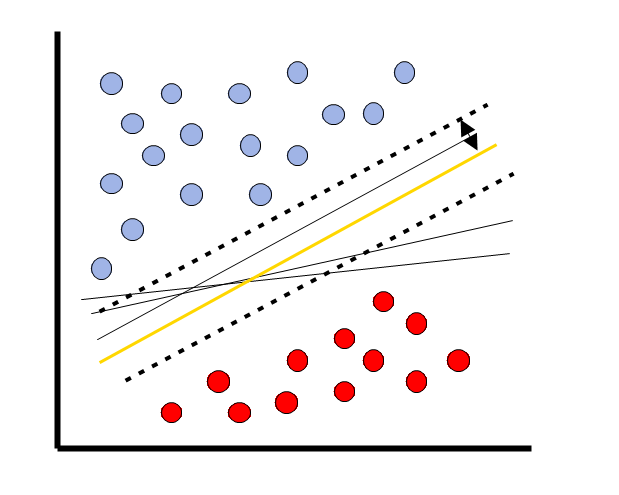

우리는 위의 이미지만 보고도 직관적으로 훈련샘플을 나누는 적당한 경계로 위아래의 간격이 일정하면서 최대가 되는 노란색선분을 선택해야한다는 것을 유추할 수 있다.

이제 훈련샘플을 나누는 견고한 선분을 찾는 방법을 수학적으로 기술하려고 한다.

**샘플 공간에서 초평면은 다음의 선형 방정식을 통해 묘사될 수 있다.**  
# $w^Tx+b=0$  
여기서 w는 법선 벡터를 의미하며 초평면의 방향을 결정하고 b는 초평면과 원점 간의 거리를 결정한다.  
<br/>
이를 통해 샘플공간에서의 임의점 x에서 초평면까지의 거리를 다음과 같이 나타낼 수 있다.  
# $r={\vert w^Tx_i+b \vert\over \begin{Vmatrix}w \end{Vmatrix}}$

초평면이 훈련 샘플을 정확히 분류할 수 있다고 한다면 아래와 같은 식이 성립된다.  
1. $w^Tx_i+b>=+1, y_i=+1$  
2. $w^Tx_i+b<=-1, y_i=-1$  


초평면에 가장 가까운 몇개의 포인트들을 서포트 벡터라고 하며 두 개의 서로 다른 클래스의 서포트 벡터에서 초평면에 거리의 합을 아래와 같이 표현 할 수 있다.

# margin=${2 \over \begin{Vmatrix}w \end{Vmatrix}}$  
이때, 거리의 합을 마진이라고 표현한다.  
서포트 벡터의 기본 모델은 이 마진을 최대화 하는 과정이라고 이해할 수 있다.

# SVM 코드 구현

In [3]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

# 꽃잎 길이, 꽃잎 너비
X = iris["data"][:, (2, 3)] 
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

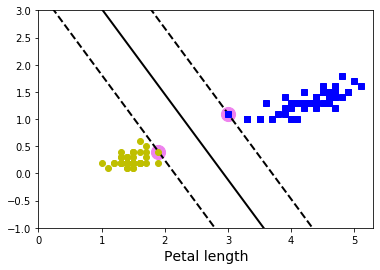

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='violet')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.3, -1, 3])

plt.show()

##### 코드는 https://www.youtube.com/watch?v=dP-cDdP_Y3A&list=PLJN246lAkhQjX3LOdLVnfdFaCbGouEBeb&index=16 을 참고하였습니다.

**쌍대문제, 커널 함수등 내용추가 예정**